# Project: Healthcare

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset 
df=pd.read_excel('1645792390_cep1_dataset.xlsx')

# 1.Preliminary analysis:

a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy


In [3]:
#checking the 5 instances of the data 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#checking the shape of the data 
df.shape

(303, 14)

In [5]:
#checking the last five instances of the data 
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#checking the duplicates 
df.duplicated().sum().any()

True

In [7]:
#dropping the duplicates 
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(302, 14)

In [9]:
#checking the null values in dataset 
df.isna().sum().any()

False

In [10]:
#checking the unique values in dataset 
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
#It appears we have a good balance between the two binary outputs.
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

# 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
cat = df.loc[:,['sex','cp','fbs','exang','slope','thal']]
cat

,sex,cp,fbs,exang,slope,thal
0,1,3,1,0,0,1
1,1,2,0,0,0,2
2,0,1,0,0,2,2
3,1,1,0,0,2,2
4,0,0,0,1,2,2
...,...,...,...,...,...,...
298,0,0,0,1,1,3
299,1,3,0,0,1,3
300,1,0,1,0,1,3
301,1,0,0,1,1,3


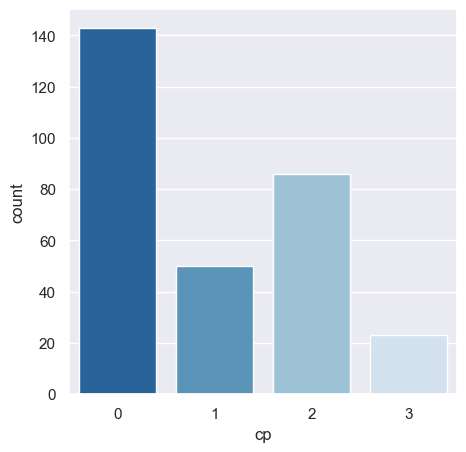

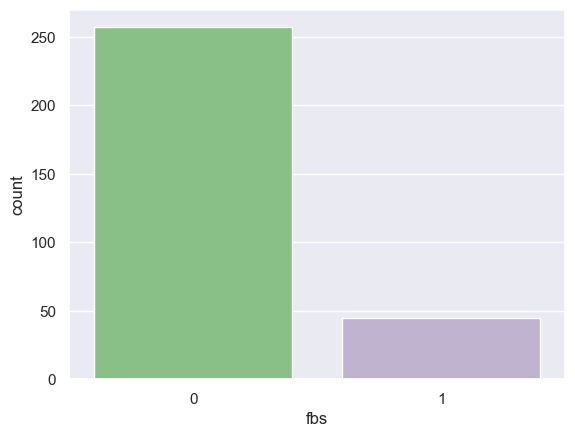

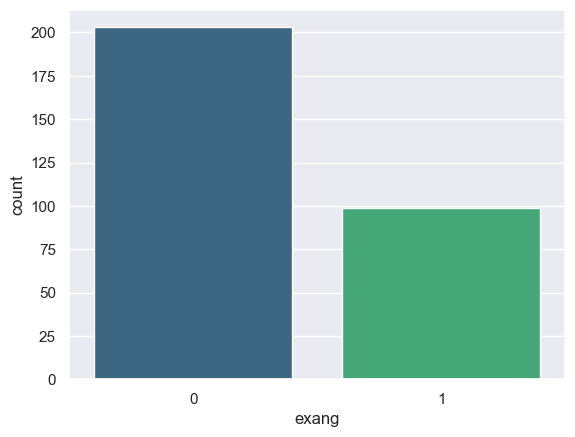

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(cat.cp,palette='Blues_r')
plt.show()
#in the case of cp we have 4 unique values in that 0 is more dominant compare to other values.
sns.countplot(cat.fbs,palette='Accent')
plt.show()
#In fbs we have 2 values in which 0 is more comapre to 1 it means fasting blood sugar is less than 120mg/ml
sns.countplot(cat.exang,palette='viridis')
plt.show()
#In exang hve 2 values in which 0 is more comapre to 1 it means exercise induced angina is no compare to yes.

In [16]:
cat.describe()

,sex,cp,fbs,exang,slope,thal
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.682119,0.963576,0.149007,0.327815,1.397351,2.314570
std,0.466426,1.032044,0.356686,0.470196,0.616274,0.613026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,2.000000,0.000000,1.000000,2.000000,3.000000
max,1.000000,3.000000,1.000000,1.000000,2.000000,3.000000


# c.	Study the occurrence of CVD across the Age category

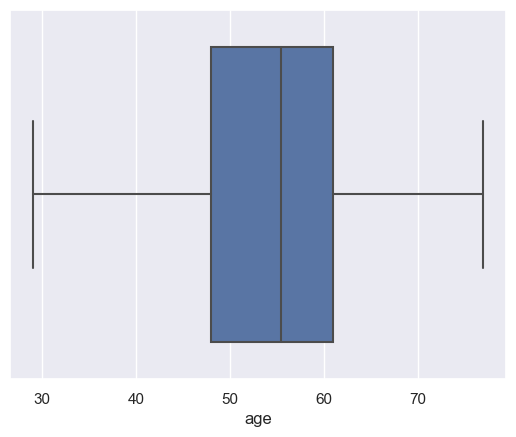

In [17]:
sns.boxplot(df.age)
plt.show()

As we can see that there is no outliers in age column

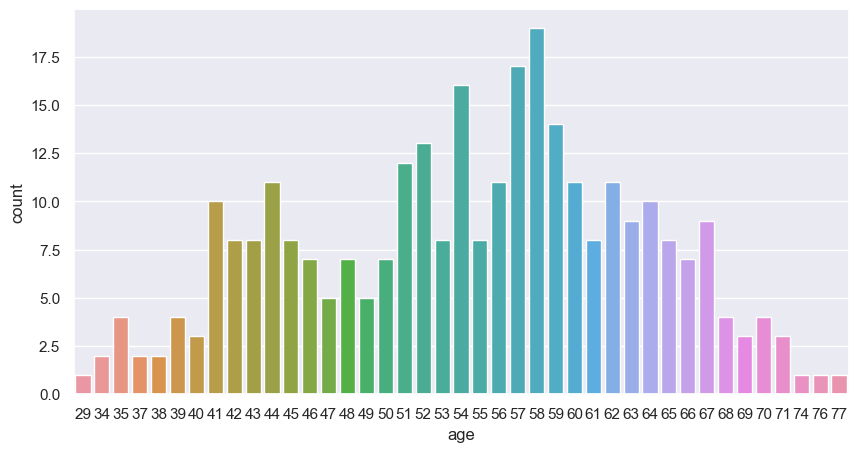

In [18]:
#doing some visualization on age feature
plt.figure(figsize=(10,5))
sns.countplot(df.age)
plt.show()

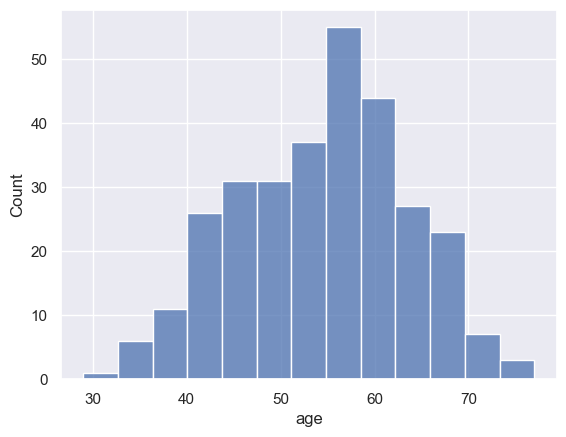

In [19]:
sns.histplot(df.age)
plt.show()

In [20]:
df.age.mean()

54.420529801324506

# d.	Study the composition of all patients with respect to the Sex category

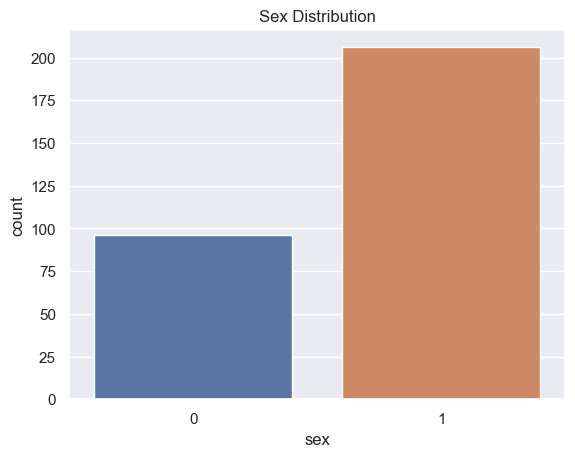

In [21]:
sns.countplot(df.sex)
plt.title('Sex Distribution')
#1 = male; 0 = female
plt.show()

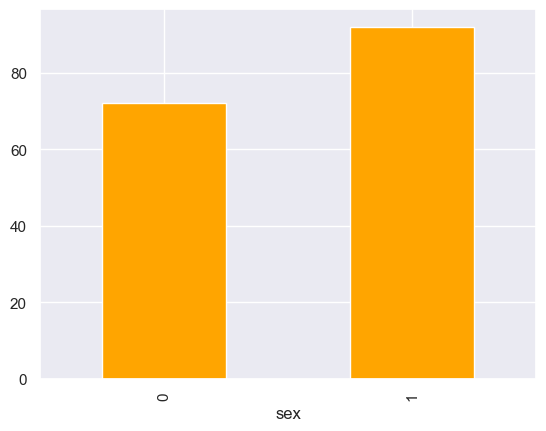

In [22]:
df[df['target']==1].groupby('sex')['target'].size().plot(kind='bar',color='orange')
plt.show()
#1 = male; 0 = female

As we can see that the males are more prone to heartattack/heartdisease compare to women

In [23]:
#d.Study the composition of all patients with respect to the Sex category
df.groupby('sex').mean()
#we can see that mean age for female is 55 and for male is 53  and chol level is 261 and 239 and major diff is in ca and thal respectively 

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125000,0.572917,151.12500,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,130.912621,239.601942,0.160194,0.504854,148.84466,0.373786,1.120874,1.383495,0.796117,2.402913,0.446602


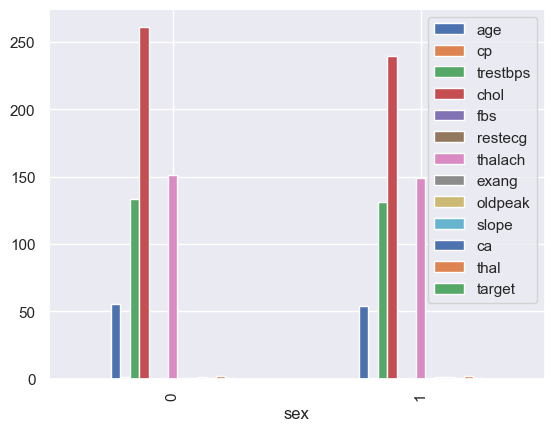

In [24]:
df.groupby('sex').mean().plot(kind='bar')
plt.show()
#1 = male; 0 = female
#we can see that chol level is high in women compare to men.

# e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [25]:
trest_bps=pd.DataFrame(df[df['target']==1].groupby('trestbps')['target'].value_counts().reset_index(name='Target_counts'))
trest_bps.sort_values(by='Target_counts',ascending=False)

,trestbps,target,Target_counts
19,130,1,23
12,120,1,23
25,140,1,17
30,150,1,9
24,138,1,9
8,110,1,8
17,128,1,6
34,160,1,5
22,135,1,5
9,112,1,5


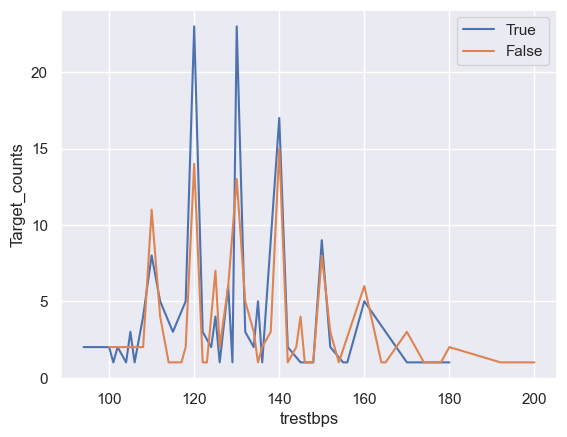

In [26]:
trest_bps_False=pd.DataFrame(df[df['target']==0].groupby('trestbps')['target'].value_counts().reset_index(name='Target_counts'))
sns.lineplot(x=trest_bps['trestbps'],y=trest_bps['Target_counts'],label='True')
sns.lineplot(x='trestbps',y='Target_counts',data=trest_bps_False,label='False')
plt.legend()
plt.show()

Text(0.5, 1.0, 'CVD TRUE')

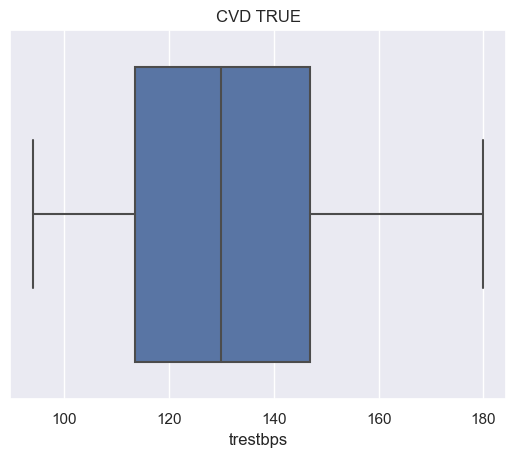

In [27]:
sns.boxplot(x=trest_bps['trestbps'])
plt.title('CVD TRUE')

Text(0.5, 1.0, 'CVD False')

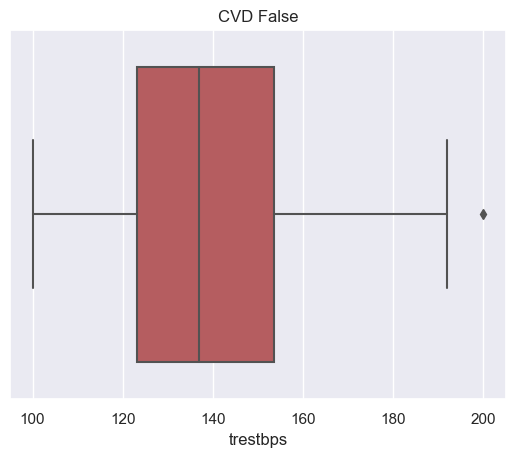

In [28]:
sns.boxplot(x=trest_bps_False['trestbps'],color='r')
plt.title('CVD False')

In [29]:
#as we can see that there are outliers in above 190 so let's drop those rows for better results 
ol=df[df['trestbps']>190].index
ol
df.drop(ol,inplace=True)

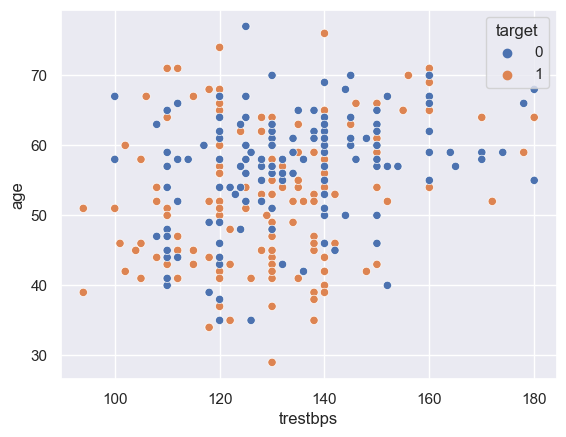

In [30]:
sns.scatterplot(df.trestbps,df.age,hue=df.target)
plt.show()

### Overall we can conclude that higer the Resting blood pressure lower the chances of getting heartattack and vice versa.

## f.	Describe the relationship between cholesterol levels and a target variable

<AxesSubplot:xlabel='chol', ylabel='Target_counts'>

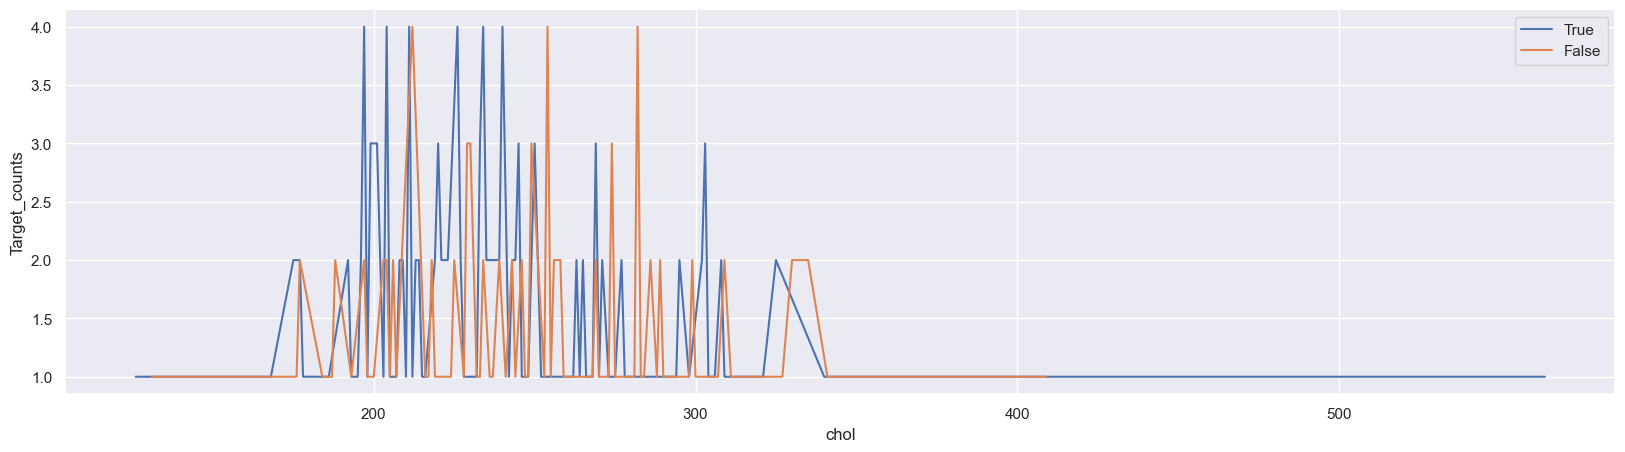

In [31]:
plt.figure(figsize=(20,5))
chol_relation=pd.DataFrame(df[df['target']==1].groupby('chol')['target'].value_counts().reset_index(name='Target_counts'))
chol_relation_false=pd.DataFrame(df[df['target']==0].groupby('chol')['target'].value_counts().reset_index(name='Target_counts'))
sns.lineplot(x=chol_relation['chol'],y=chol_relation['Target_counts'],label='True')
sns.lineplot(x=chol_relation_false['chol'],y=chol_relation_false['Target_counts'],label='False')
#sns.lineplot(x='trestbps',y='Target_counts',data=trest_bps_False,label='False')

Text(0.5, 1.0, 'CVD TRUE')

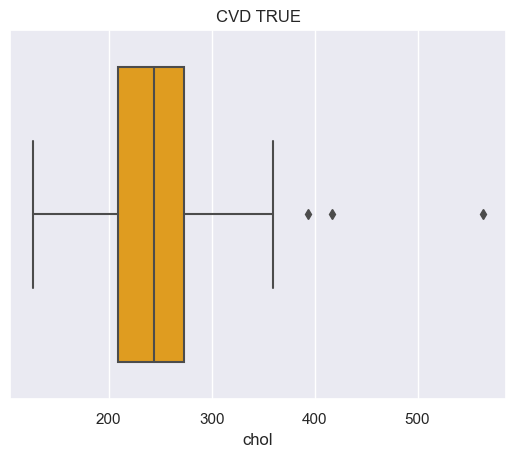

In [32]:
sns.boxplot(x=chol_relation['chol'],color='orange')
plt.title('CVD TRUE')
#we can see that there is a outlier above 350 chol level 

Text(0.5, 1.0, 'CVD False')

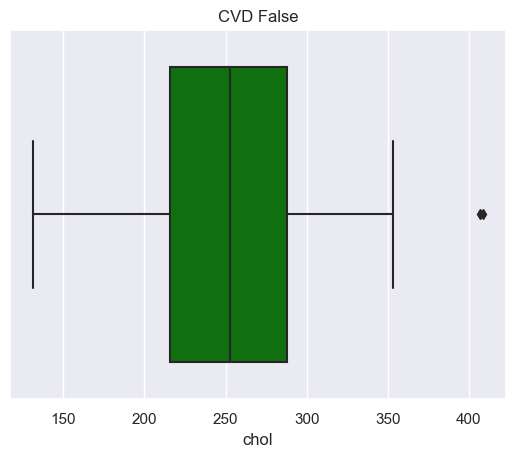

In [33]:
sns.boxplot(x=chol_relation_false['chol'],color='green')
plt.title('CVD False')
#we can see that there is a outlier above 350 chol level 

In [34]:
#outlier treament 
ol_2=df[df['chol']>350].index
print(ol_2)
df.drop(ol_2,inplace=True)

Int64Index([4, 28, 39, 85, 96, 180, 220, 246], dtype='int64')


We can say that mostly the density of chol level is between 200-350 and the above plots doesn't show the great relationship between target variable but overall we can interpret that chol level between 200-300 has higher chances of getting the heartattack.

## g.	State what relationship exists between peak exercising and the occurrence of a heart attack

<AxesSubplot:xlabel='oldpeak'>

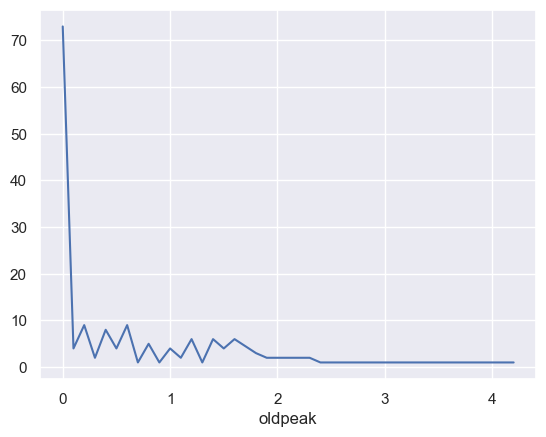

In [35]:
df[df['target']==1].groupby('oldpeak')['target'].count().plot()

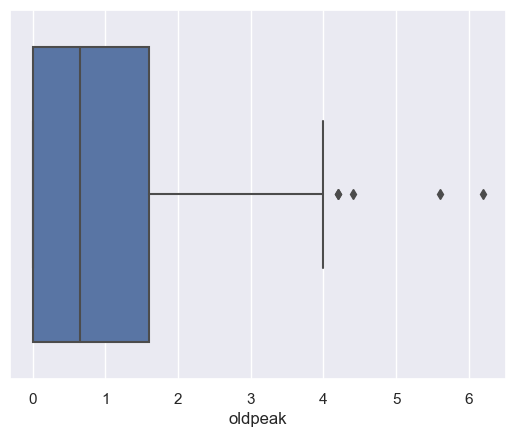

In [36]:
sns.boxplot(df.oldpeak)
plt.show()
#above 4 we have outliers 

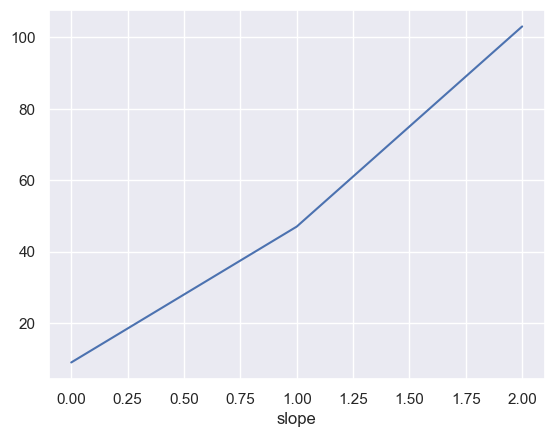

In [37]:
df[df['target']==1].groupby('slope')['target'].count().plot()
plt.show()

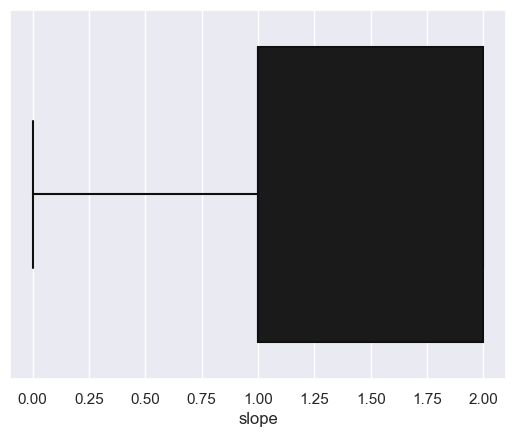

In [38]:
sns.boxplot(df.slope,color='k')
plt.show()

In [39]:
#treatment for outliers 
ol_3=df[df['oldpeak'] > 4].index
ol_3
df.drop(ol_3,inplace=True)

Overall we can conclude that there are some outliers present in oldpeak data and no outliers in slope data and after looking at the distribution of the data we can say that data is not a normal distribution apart from that we can say that lower the old peak and higher the slope lead to higher risk of heartattack as per data and vice versa.

## h.Check if thalassemia is a major cause of CVD

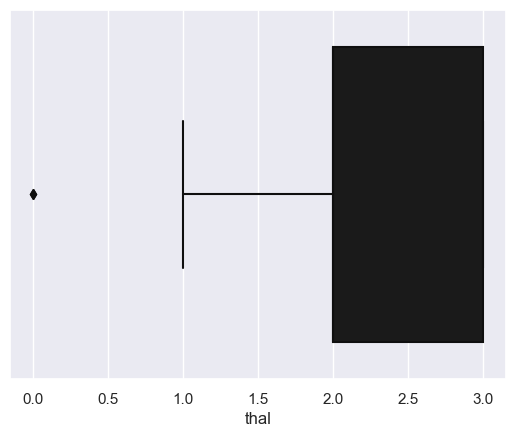

In [40]:
#let's check though we have any outliers or not in thalassemia 
sns.boxplot(df.thal,color='k')
plt.show()

So we have the outliers at the lower side so let's considered the minimum threhold as 1.0.

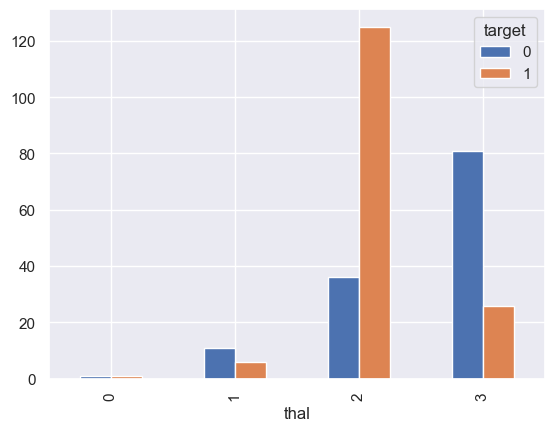

In [41]:
#Let's check the relationship 
df.groupby('thal')['target'].value_counts().unstack().plot(kind='bar')
plt.show()

In [42]:
#treatment of outliers 
ol_4=df[df['thal']< 1.0].index
df.drop(ol_4,inplace=True)

We can see those who are having thal as 2 there is a higher chances that person will suffer Heart disease followed by other.

##  i.	List how the other factors determine the occurrence of CVD

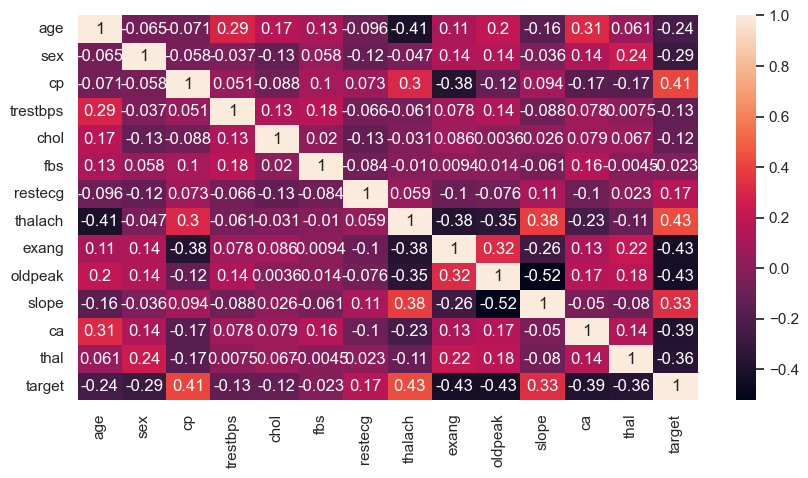

In [43]:
#Let's plot the correlation matrix 
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [44]:
#Correlation with output variable
cor=df.corr()
cor_target = (cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

cp         0.413343
restecg    0.166547
thalach    0.432552
slope      0.329772
target     1.000000
Name: target, dtype: float64

In [45]:
#mean distribution of the dataset 
pd.pivot_table(df,index='target')

,age,ca,chol,cp,exang,fbs,oldpeak,restecg,sex,slope,thal,thalach,trestbps
target,,,,,,,,,,,,,
0,56.632812,1.117188,247.726562,0.507812,0.546875,0.156250,1.455469,0.437500,0.843750,1.203125,2.546875,138.734375,133.257812
1,52.203822,0.350318,237.057325,1.363057,0.140127,0.140127,0.554140,0.611465,0.579618,1.598726,2.127389,158.764331,128.764331


# j.	Use a pair plot to understand the relationship between all the given variables

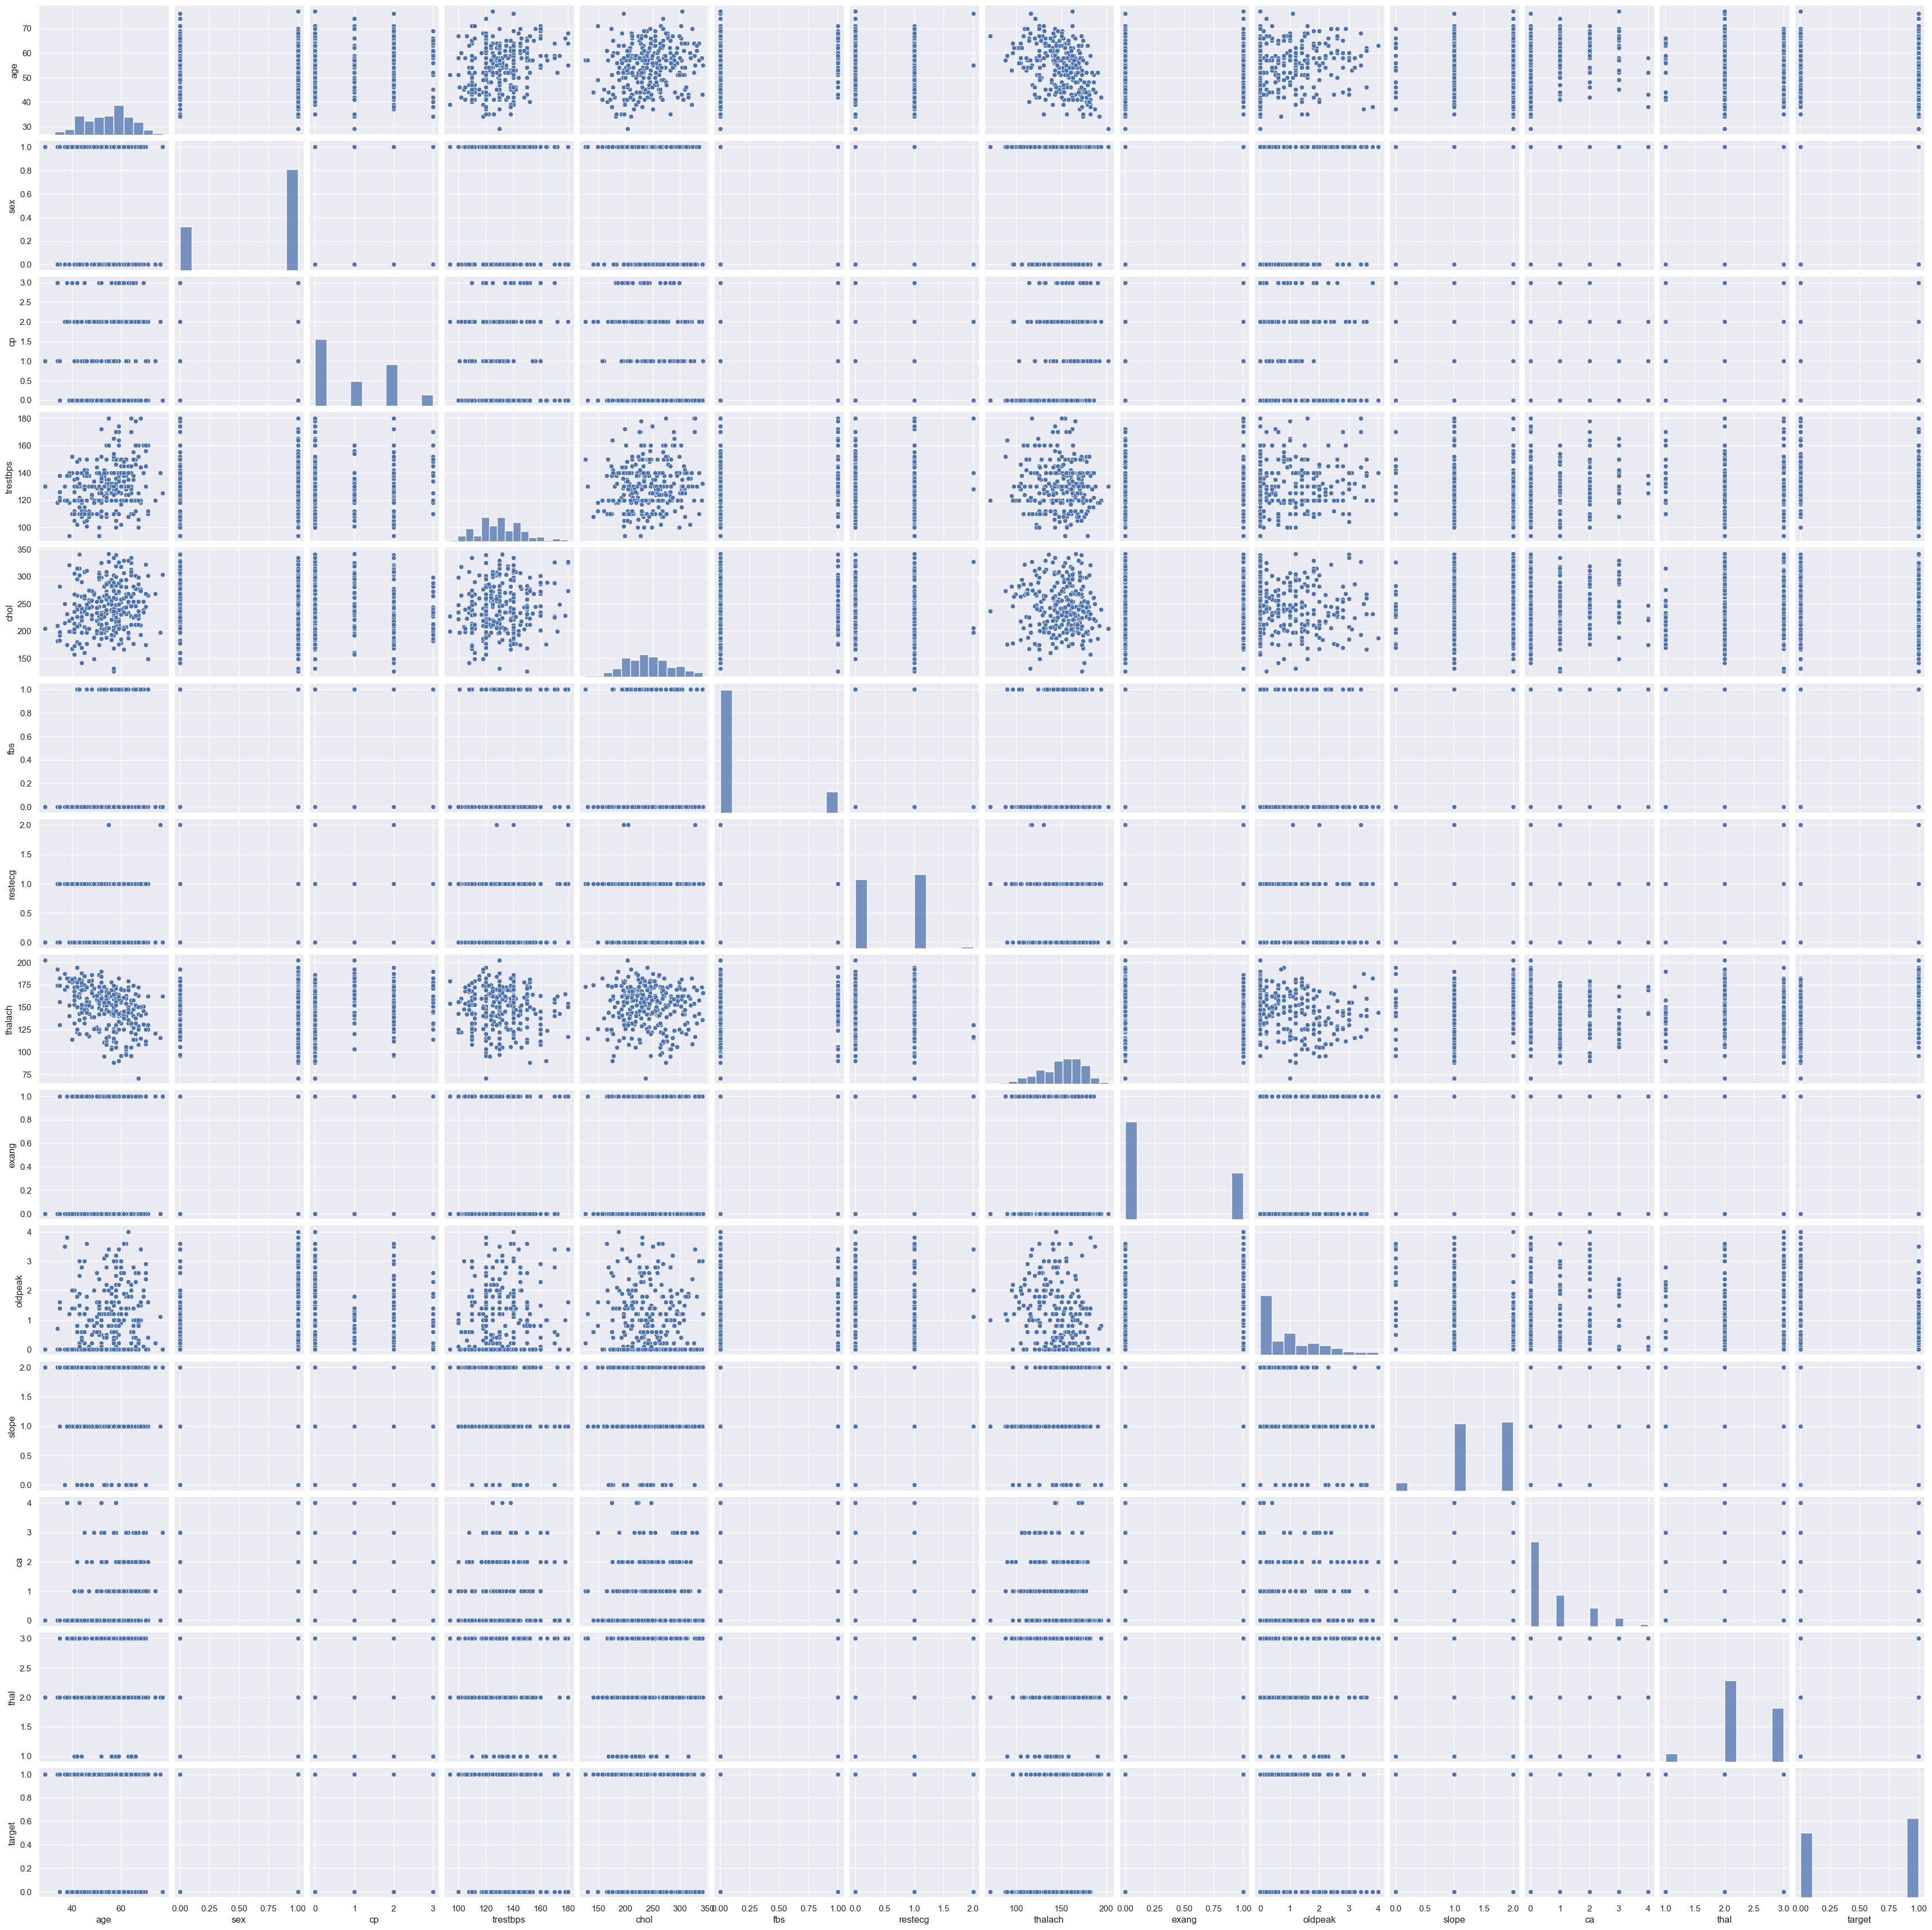

In [46]:
sns.pairplot(df)
plt.show()

### 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and exploring the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection.



### LOGISTIC REGRESSION

In [47]:
#Dividing the data into x and y variable 
x=df.iloc[:,:-1].values
y=df.target.values
print(x)
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
#scaling the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x_scaled=sc.transform(x)

In [49]:
#RFE for Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# feature extraction
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25)
model = LogisticRegression(solver='lbfgs')


In [50]:
rfe=RFE(estimator=model)
fit=rfe.fit(x_train,y_train)

In [51]:
fit.n_features_
#as we can see the RFE has selected top 6 features 

6

In [52]:
fit.support_

array([False,  True,  True, False, False, False, False,  True,  True,
        True, False,  True, False])

In [53]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [54]:
fit.ranking_

array([7, 1, 1, 3, 5, 8, 4, 1, 1, 1, 6, 1, 2])

In [55]:
#we have selected the top 6 features #logit function  
x_new=df.loc[:,['sex','cp','thalach','oldpeak','ca','thal']].values
y_new=df.target.values
import statsmodels.api as sm
logit_model=sm.Logit(y_new,x_new)
result=logit_model.fit()
print(result.summary2())

#as we can see that the p value is less than our critical error rate that 0.05

Optimization terminated successfully.
         Current function value: 0.380899
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.446     
Dependent Variable: y                AIC:              229.1127  
Date:               2023-01-02 12:37 BIC:              251.0276  
No. Observations:   285              Log-Likelihood:   -108.56   
Df Model:           5                LL-Null:          -196.07   
Df Residuals:       279              LLR p-value:      6.1751e-36
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -1.2737      0.4098    -3.1077    0.0019    -2.0769    -0.4704
x2     0.8208      0.1718     4.7772    0.0000     0.4

In [56]:
#building our model 
new_df=df.loc[:,['sex','cp','thalach','oldpeak','ca','thal','target']]
x_new_scaled=new_df.drop('target',axis=1).values
y=new_df.target.values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_new_scaled)
x_scaled_final=sc.transform(x_new_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_scaled_final,y,test_size=.25)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(213, 6)
(72, 6)
(213,)
(72,)


In [58]:
#building and training the model
final_model_lr=LogisticRegression()
final_model_lr.fit(x_train,y_train)
y_pred_final=final_model_lr.predict(x_test)

In [59]:
#Evaluation
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred_final))
print('accuracy score :',accuracy_score(y_test,y_pred_final)*100 )

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        29
           1       0.86      0.74      0.80        43

    accuracy                           0.78        72
   macro avg       0.78      0.79      0.78        72
weighted avg       0.79      0.78      0.78        72

accuracy score : 77.77777777777779


### Random Forest Classifier 

In [77]:
#Using RFE for feature selection
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
rfe=RFE(estimator=clf)

# feature extraction
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25)
fit_random=rfe.fit(x_train,y_train)

In [70]:
fit_random.n_features_

6

In [71]:
fit_random.ranking_

array([1, 6, 1, 5, 2, 8, 7, 1, 3, 1, 4, 1, 1])

In [72]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

 We can see that in random forest classifier our RFE have selected the 6 different features comapre to Logistic regression model

In [73]:
#Building and training the model 
#we have selected the top 6 features 
x_random_clf=df.loc[:,['cp','thalach','exang','oldpeak','ca','thal','target']]
x=x_random_clf.drop('target',axis=1).values
y=x_random_clf.target.values
#scaled the new data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x_scaled_final=sc.transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaled_final,y,test_size=0.30)

In [74]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(199, 6)
(86, 6)
(199,)
(86,)


In [78]:
#building and training the model
final_model_random=RandomForestClassifier()
final_model_random.fit(x_train,y_train)
y_pred_final=final_model_random.predict(x_test)

In [79]:
#Evaluation
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred_final))
print('accuracy score :',accuracy_score(y_test,y_pred_final)*100)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.89      0.86      0.88        37

    accuracy                           0.88        72
   macro avg       0.88      0.88      0.87        72
weighted avg       0.88      0.88      0.88        72

accuracy score : 87.5


CONCLUSION:
Performace of both Random Forest is quite better compare to Logistic Regression
The Features which is a strong representation of target varibale are'cp','thalach','exang','oldpeak','ca','thal' in case of random forest classifier.
The Features which is a strong representation of target variables are 'sex','cp','thalach','oldpeak','ca','thal' in case of Logistic Regression.
But more or less than there are some common features in both the models. 